# **MOVIE** **RECOMMENDATION SYSTEM**



## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## LOAD THE DATASET

In [3]:
net_mov = pd.read_csv("/content/drive/MyDrive/movie_pro/netflix_movies.csv")
net_mov

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## ANALYSING THE DATA

In [4]:
net_mov.shape

(8807, 12)

In [5]:
net_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


out of 12 columns 11 are object type and 1 is numerical

In [6]:
# missing value analysis
miss = net_mov.isnull().sum()
miss

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

director, cast country,date_added, rating, duration columns have missing values

In [7]:
per = (miss/len(net_mov))*100
per

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Handling missing values

In [8]:
net_mov['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [9]:
net_mov['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [10]:
#filling country and date_added with mode
net_mov['country'] = net_mov['country'].fillna(net_mov['country'].mode()[0])
net_mov['date_added'] = net_mov['date_added'].fillna(net_mov['date_added'].mode()[0])
net_mov['rating'] = net_mov['rating'].fillna(net_mov['country'].mode()[0])
net_mov['duration'] = net_mov['duration'].fillna(net_mov['duration'].mode()[0])

In [11]:
#we are dropping the rows having missing values in director and cast because it's not good to fill using mode and any other techniques.
net_mov = net_mov.dropna(how = 'any', subset = ['director', 'cast'])

In [12]:
net_mov.shape

(5700, 12)

In [13]:
net_mov.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
net_mov

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


for interpreting the dataset easily some cleaning and preprocessing steps are performing

In [15]:
net_mov = net_mov.rename(columns={"listed_in":"Genre"})
net_mov['Genre'] = net_mov['Genre'].apply(lambda x: x.split(",")[0])

In [16]:
#renaming and splitting the values into two columns
net_mov['year_added'] = net_mov['date_added'].apply(lambda x: x.split(" ")[-1])

In [17]:
net_mov['month_added'] = net_mov['date_added'].apply(lambda x: x.split(" ")[0])
net_mov['month_added']

2       September
5       September
6       September
7       September
8       September
          ...    
8801        March
8802     November
8804     November
8805      January
8806        March
Name: month_added, Length: 5700, dtype: object

In [18]:
net_mov['country'] = net_mov['country'].apply(lambda x: x.split(",")[0])

In [19]:
net_mov

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,September
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",United Arab Emirates,"March 9, 2016",2015,TV-MA,96 min,Dramas,Recovering alcoholic Talal wakes up inside a s...,2016,March
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a...",2019,November
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,2019,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,January


In [20]:
#date_added and show_id are not needed more
net_mov.drop(['date_added'], axis = 1, inplace = True)
net_mov.drop(['show_id'], axis = 1, inplace = True)

In [21]:
net_mov.shape

(5700, 12)

In [22]:
net_mov['type'].value_counts()

Movie      5522
TV Show     178
Name: type, dtype: int64

In [23]:
net_mov['rating'].value_counts()

TV-MA            1939
TV-14            1329
R                 789
PG-13             477
TV-PG             456
PG                279
TV-Y7             123
TV-Y              102
TV-G               96
NR                 58
G                  40
TV-Y7-FV            3
UR                  3
NC-17               2
74 min              1
84 min              1
66 min              1
United States       1
Name: rating, dtype: int64

# DATA ANALYSIS USING PLOTS

<Axes: xlabel='type', ylabel='count'>

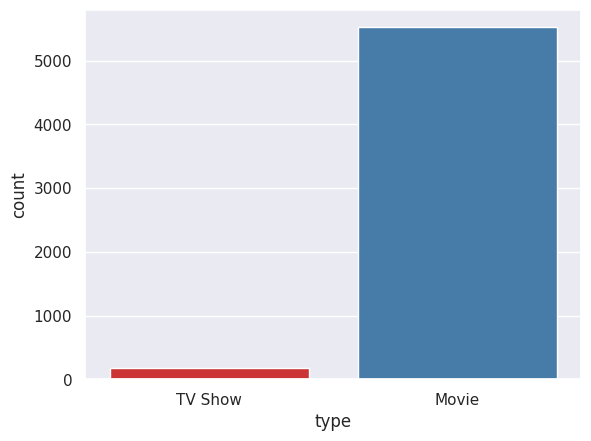

In [24]:
#movies vs tv show
sns.set(style="darkgrid")
sns.countplot(x="type", data= net_mov, palette="Set1")

netflix provides movies than tv show

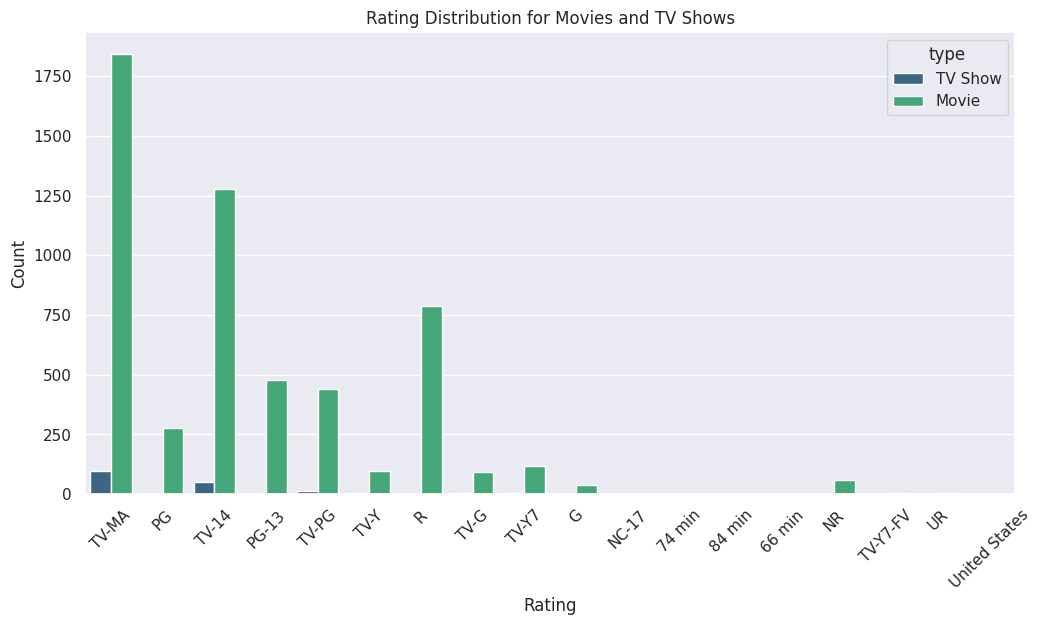

In [25]:
# Rating distribution for Movies and TV Shows
plt.figure(figsize=(12, 6))
sns.countplot(x="rating", data=net_mov, hue="type", palette="viridis")
plt.title('Rating Distribution for Movies and TV Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In movie type high rating is for TV-MA, second rating goes to TV-14.
In tv shows high rating goes to TV-MA, next is to TV-14

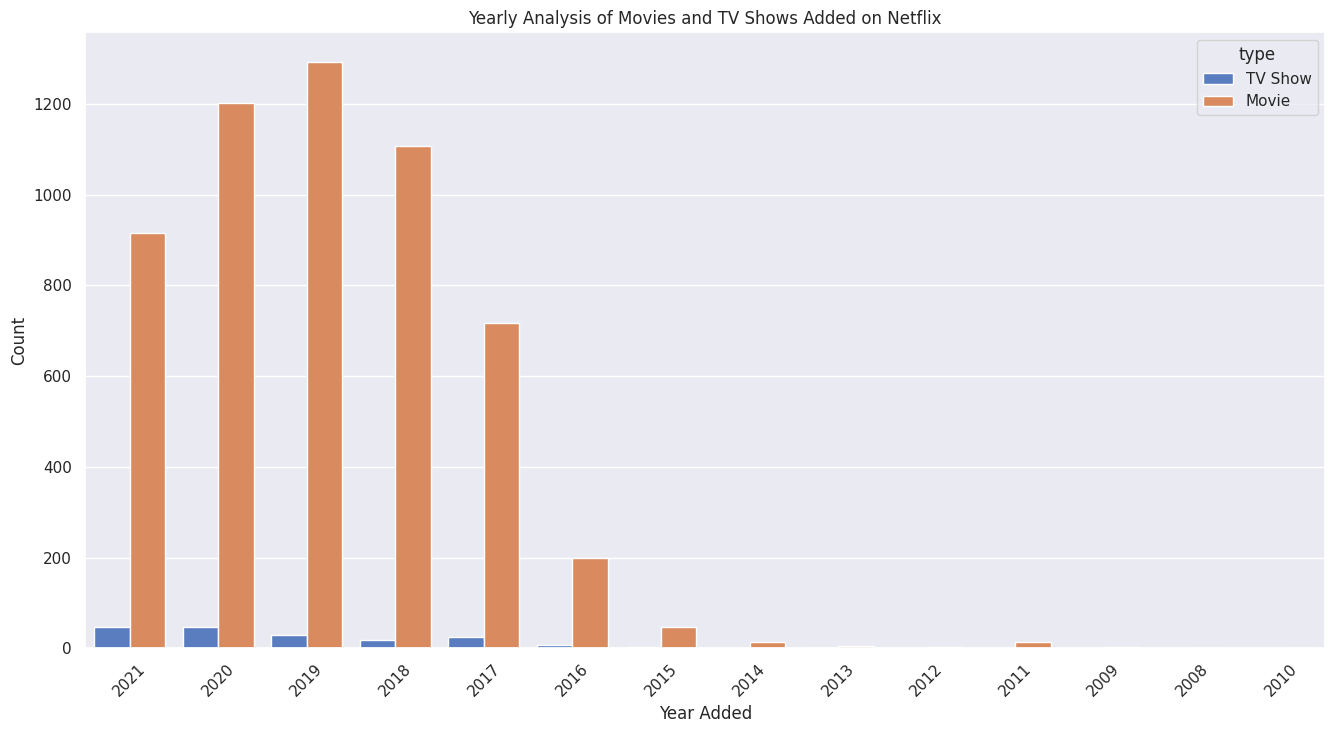

In [26]:
# Yearly analysis plot
plt.figure(figsize=(16, 8))
sns.countplot(x="year_added", data=net_mov, hue="type", palette="muted")
plt.title('Yearly Analysis of Movies and TV Shows Added on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

2019, 2020, 2018, 2021 are the years netflix added large amount of movies.
2020,2021, 2019, 2017 are the years netflix added large amount of tv show

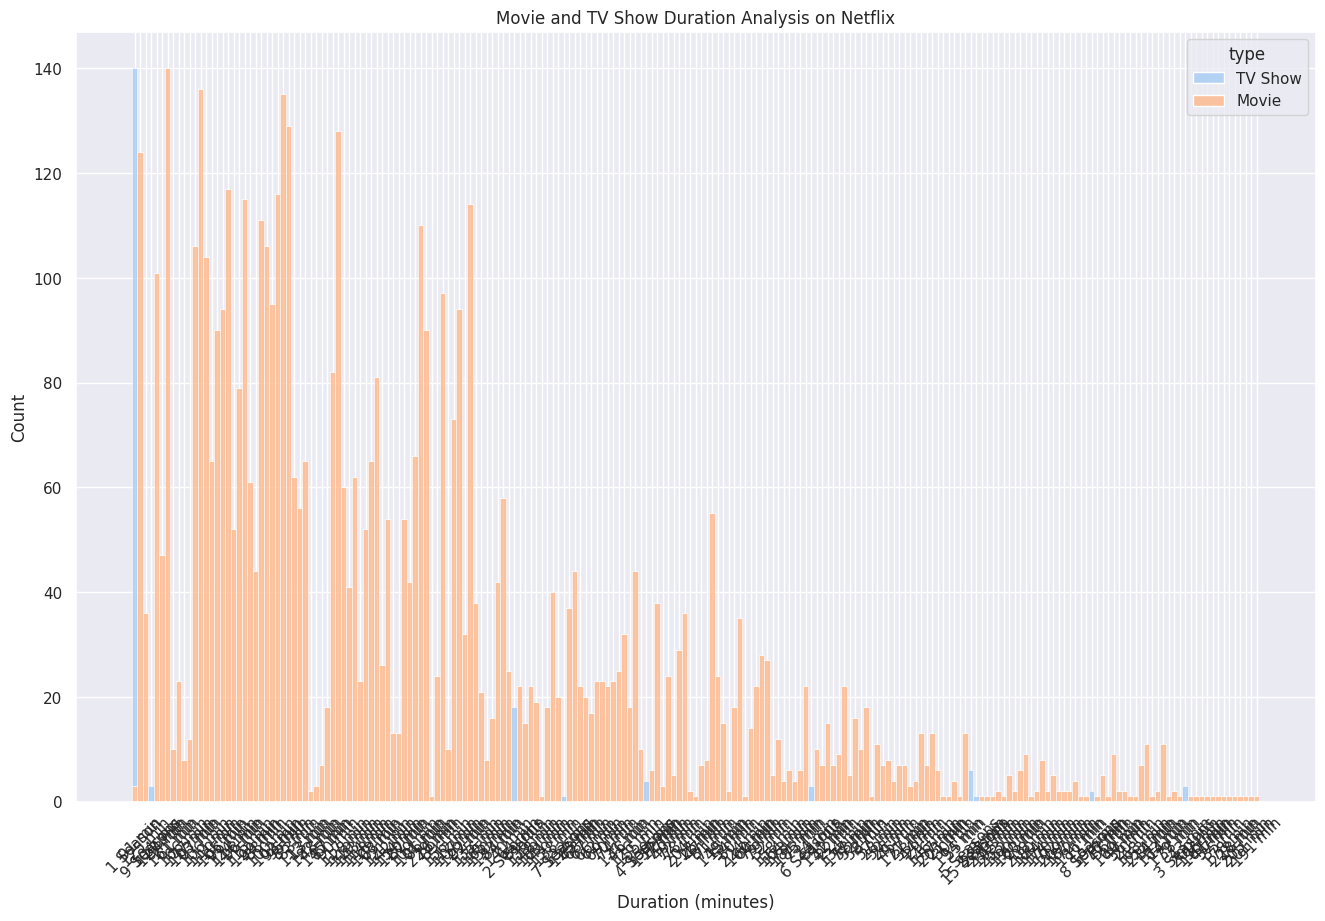

In [27]:
# Movie and TV Show Duration Analysis
plt.figure(figsize=(16, 10))
sns.histplot(x="duration", data=net_mov, hue="type", multiple="stack", palette="pastel", binwidth=5)
plt.title('Movie and TV Show Duration Analysis on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Convert 'duration' column to numeric
net_mov['duration'] = pd.to_numeric(net_mov['duration'].str.extract('(\d+)')[0])

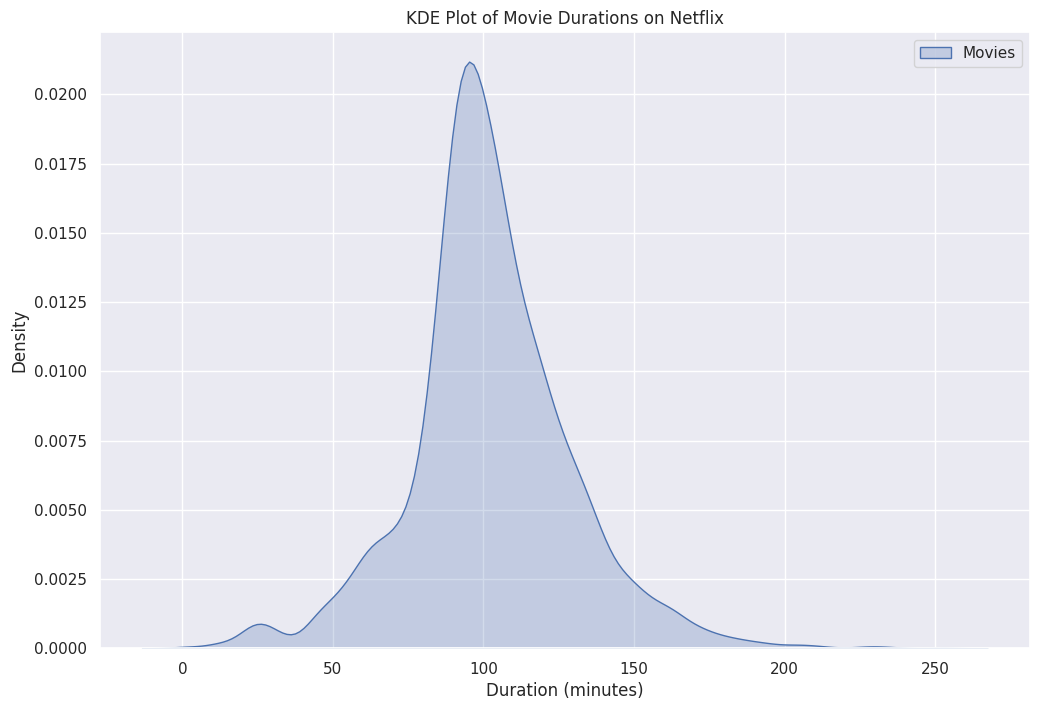

In [29]:
# KDE Plot for Movie Durations
plt.figure(figsize=(12, 8))
sns.kdeplot(x="duration", data=net_mov[net_mov['type'] == 'Movie'], fill=True, common_norm=False, palette="Set2", label='Movies')
plt.title('KDE Plot of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

the majority of movies are having 75 to 120 as the duration of the movie

Making two new dataframes for movies and TV shows


In [30]:
movie_df = net_mov[net_mov['type'] == 'Movie']
tv_df = net_mov[net_mov['type'] == 'TV Show']

In [31]:
movie_df

,type,title,director,cast,country,release_year,rating,duration,Genre,description,year_added,month_added
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104,Comedies,A woman adjusting to life after a loss contend...,2021,September
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,2021,TV-MA,127,Dramas,After most of her family is murdered in a terr...,2021,September
13,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,2021,TV-PG,91,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",United Arab Emirates,2015,TV-MA,96,Dramas,Recovering alcoholic Talal wakes up inside a s...,2016,March
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158,Cult Movies,"A political cartoonist, a crime reporter and a...",2019,November
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88,Comedies,Looking to survive in a world taken over by zo...,2019,November
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,January


In [32]:
tv_df

,type,title,director,cast,country,release_year,rating,duration,Genre,description,year_added,month_added
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021,TV-MA,1,TV Dramas,The arrival of a charismatic young priest brin...,2021,September
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9,British TV Shows,A talented batch of amateur bakers face off in...,2021,September
11,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,2021,TV-MA,1,Crime TV Shows,"Struggling to earn a living in Bangkok, a man ...",2021,September
47,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",United States,2020,TV-MA,1,International TV Shows,Five glamorous millennials strive for success ...,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...
8172,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,2015,TV-Y7,1,Kids' TV,"A hungry fox and three resourceful, surprising...",2018,March
8214,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,2001,TV-G,1,British TV Shows,David Attenborough narrates this definitive ex...,2015,October
8293,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,2012,TV-MA,1,British TV Shows,Richie Beckett is an aging Brighton crime boss...,2017,March
8302,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,2016,TV-MA,1,British TV Shows,Twenty years after 5-year-old Jesse disappears...,2017,September


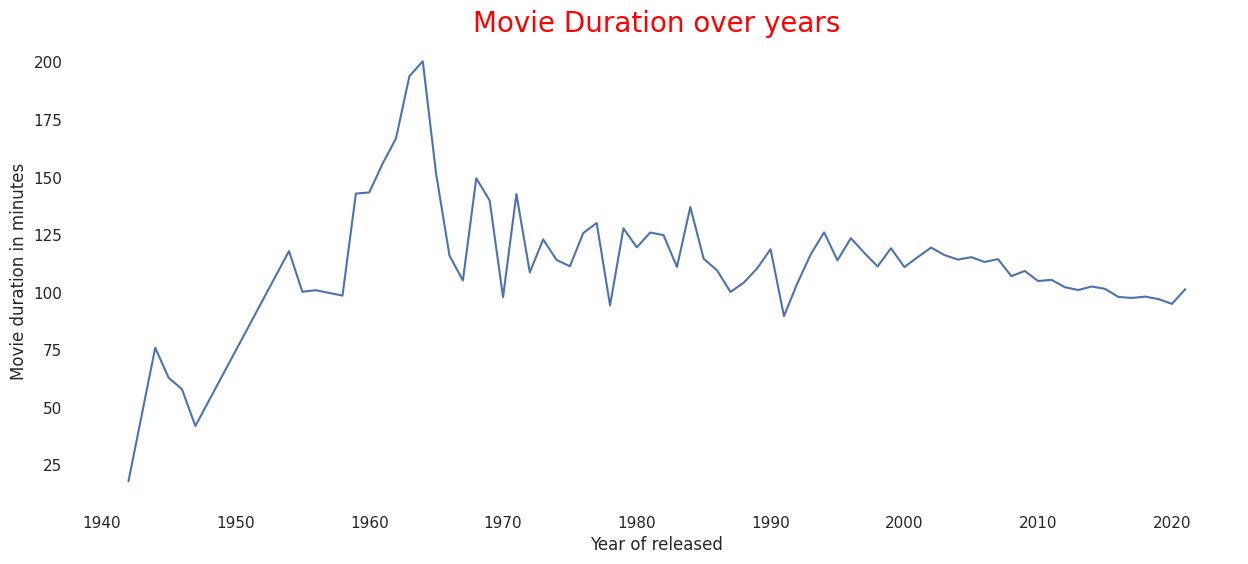

In [33]:
#movie duration over years
duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sns.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title("Movie Duration over years", fontsize=20, color='red');

from 1960 to 1965 the Movie durations were 200 minutes.
after 1965 the durations became shorter.
from 1980 movie durations is between 100-150 minutes.

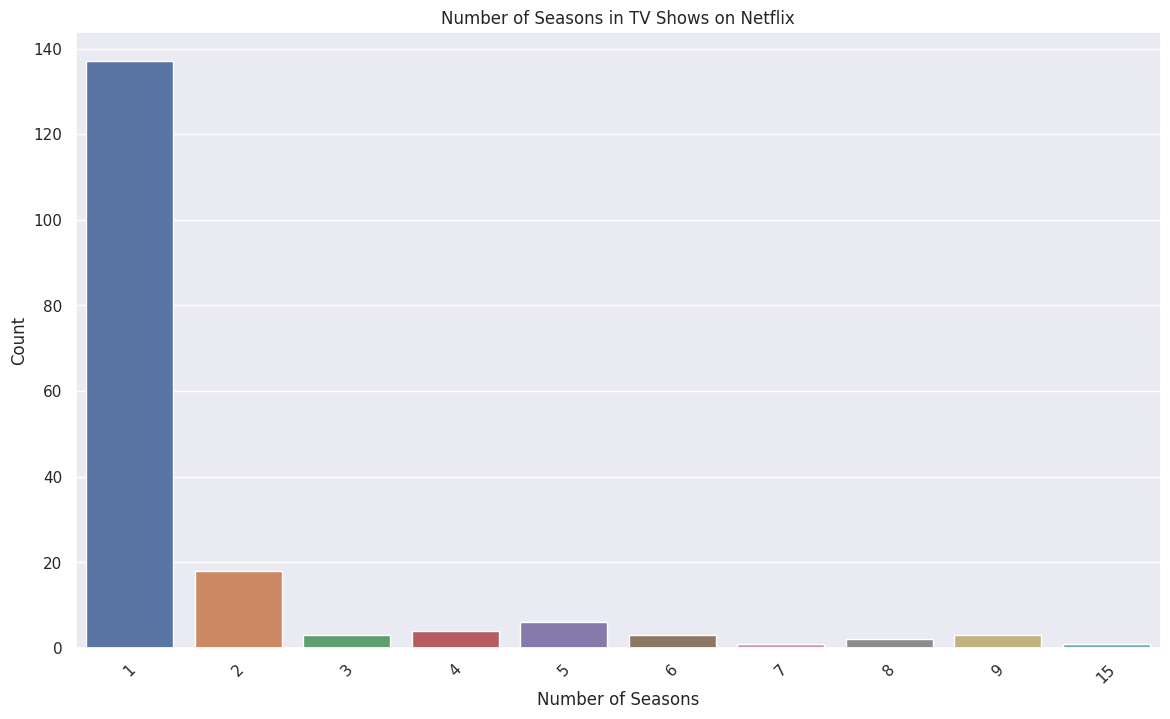

In [34]:
# Countplot for Number of Seasons in TV Shows
plt.figure(figsize=(14, 8))
sns.countplot(x="duration", data=tv_df, palette="deep")
plt.title('Number of Seasons in TV Shows on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

135 TV shows have only 1 season.
around 15 above tv shows have 2 seasons.

In [35]:
#Extract the columns title and duration from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [36]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


<Axes: xlabel='title'>

<Figure size 1000x600 with 0 Axes>

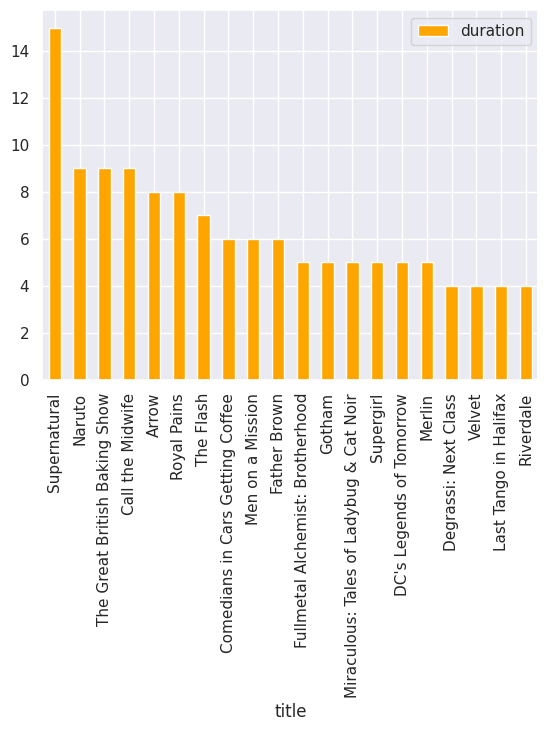

In [37]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='orange')

Supernatural , Naruto,The Great British Baking, and Call the Midwife has the highest numbers of seasons.

<Axes: xlabel='country', ylabel='count'>

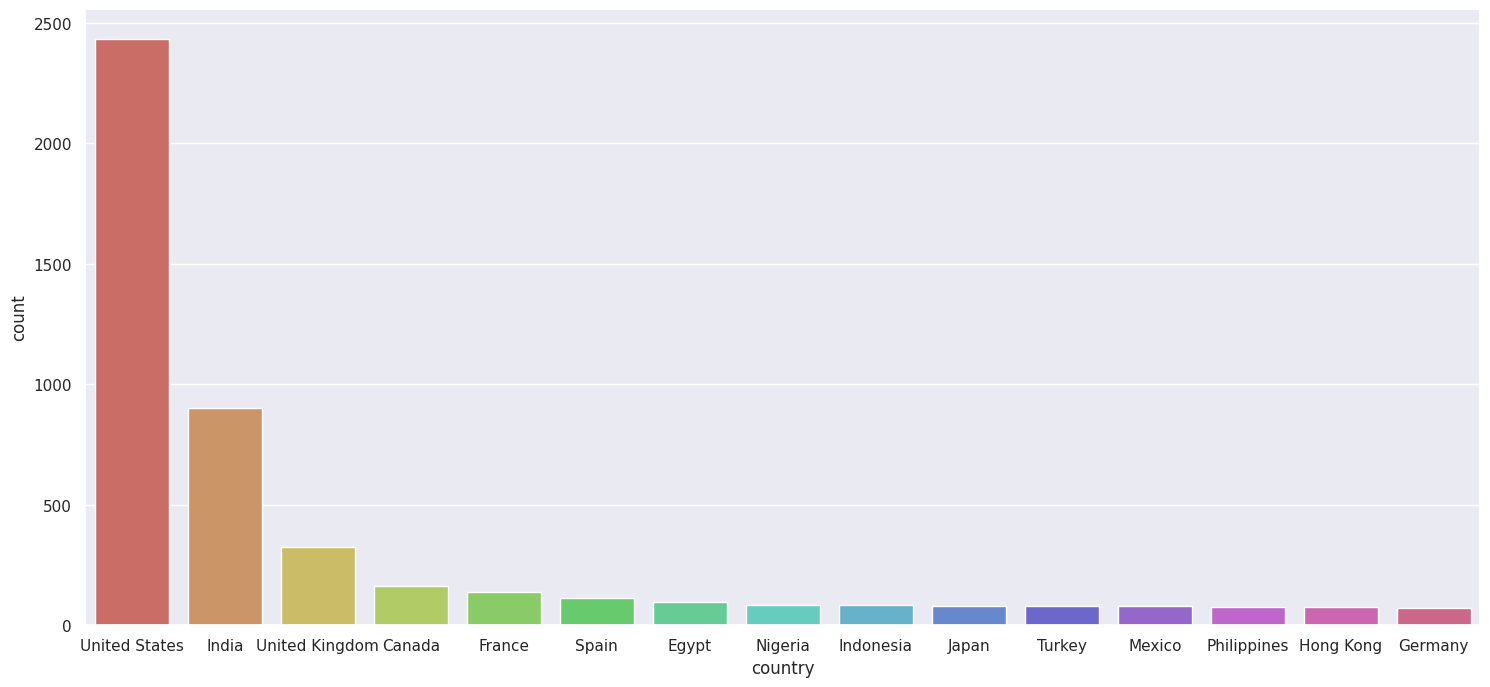

In [38]:
#countries based on content creation of movies
plt.figure(figsize=(18,8))
sns.countplot(x="country", data=movie_df, palette="hls", order=movie_df['country'].value_counts().index[0:15])

United States , India , United Kingdom are in the first positions in creating movies.


<Axes: xlabel='country', ylabel='count'>

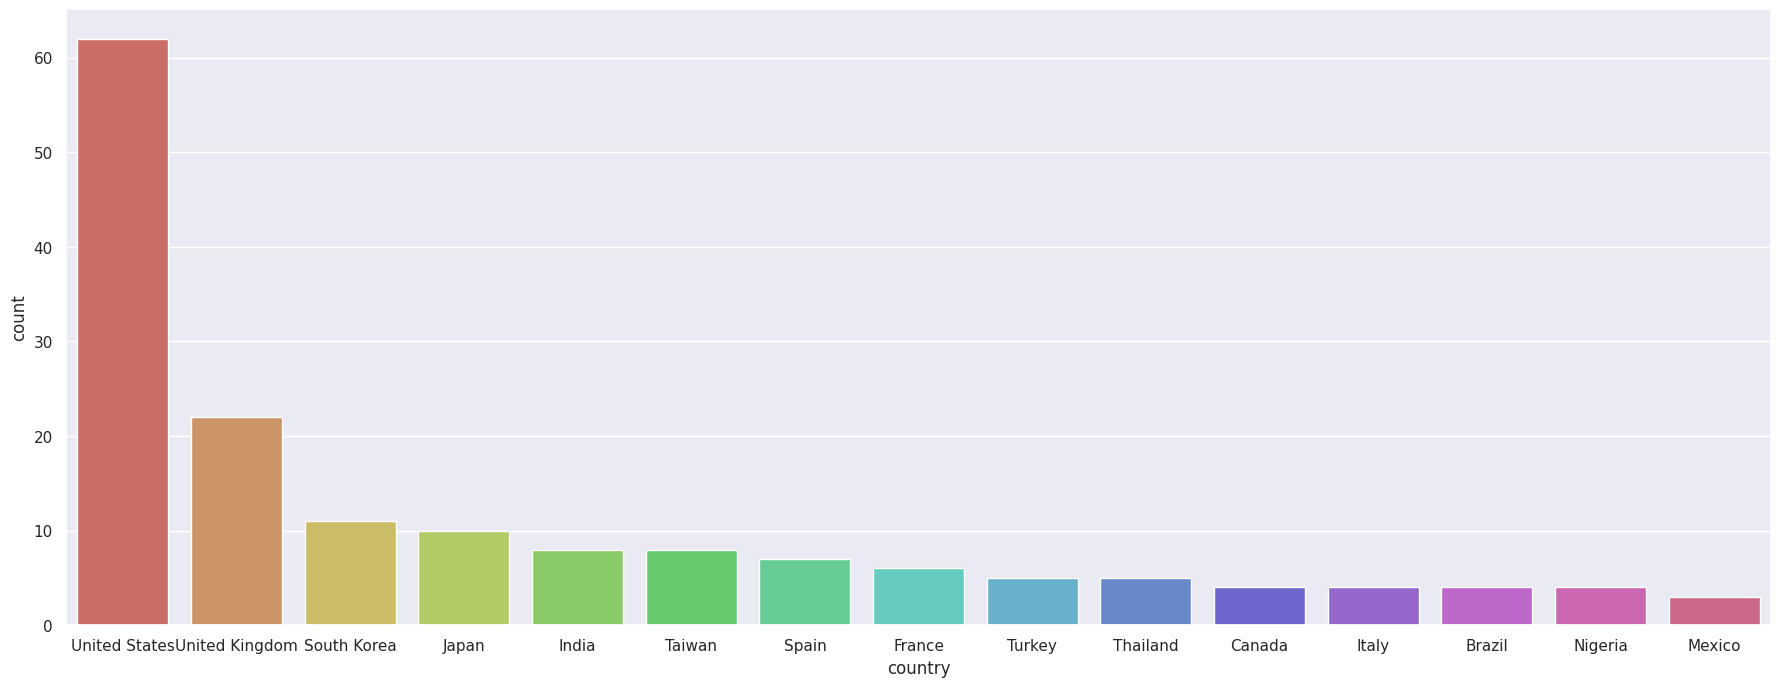

In [39]:
#countries based on content creation for tv shows
plt.figure(figsize=(22,8))
sns.countplot(x="country", data=tv_df, palette="hls", order=tv_df['country'].value_counts().index[0:15])

United States,United Kingdom,South Korea creates most of the TV Shows.

In [40]:
# Genres of contents created by Countries
columns=['Genre','country']
country_genre = net_mov[columns]

In [41]:
country_genre

,Genre,country
2,Crime TV Shows,United States
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,United States
8,British TV Shows,United Kingdom
...,...,...
8801,Dramas,United Arab Emirates
8802,Cult Movies,United States
8804,Comedies,United States
8805,Children & Family Movies,United States


In [42]:
country_genre['Genre'].value_counts()

Dramas                          1586
Comedies                        1184
Action & Adventure               848
Children & Family Movies         548
Documentaries                    397
Stand-Up Comedy                  309
Horror Movies                    274
International Movies             122
Classic Movies                    73
Thrillers                         65
International TV Shows            59
Crime TV Shows                    37
Movies                            30
British TV Shows                  21
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
Sci-Fi & Fantasy                  13
Cult Movies                       12
Anime Series                      11
Kids' TV                          11
Docuseries                        10
TV Shows                           9
Stand-Up Comedy & Talk Shows       8
Romantic Movies                    3
TV Comedies                        3
Classic & Cult TV                  2
T

In [43]:
!pip install squarify

- United states produces most amount of content in 'Comedies' and 'Childern & Family movies' Genres.

Text(0.5, 1.0, 'Number of Content Released by Year')

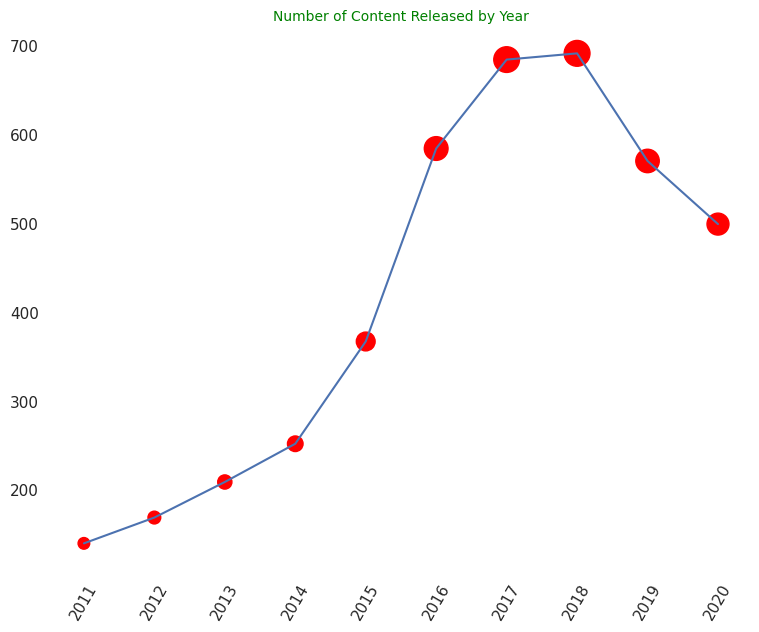

In [44]:
#number of content released in each year
release = net_mov['release_year'].value_counts()
release = release.sort_index(ascending=True)
plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red')
plt.box(on=None)
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index)
plt.title('Number of Content Released by Year', color='green', fontsize=10)

2017 and 2018 released around 700 contents

Text(0.5, 0, 'Number of Movies Released')

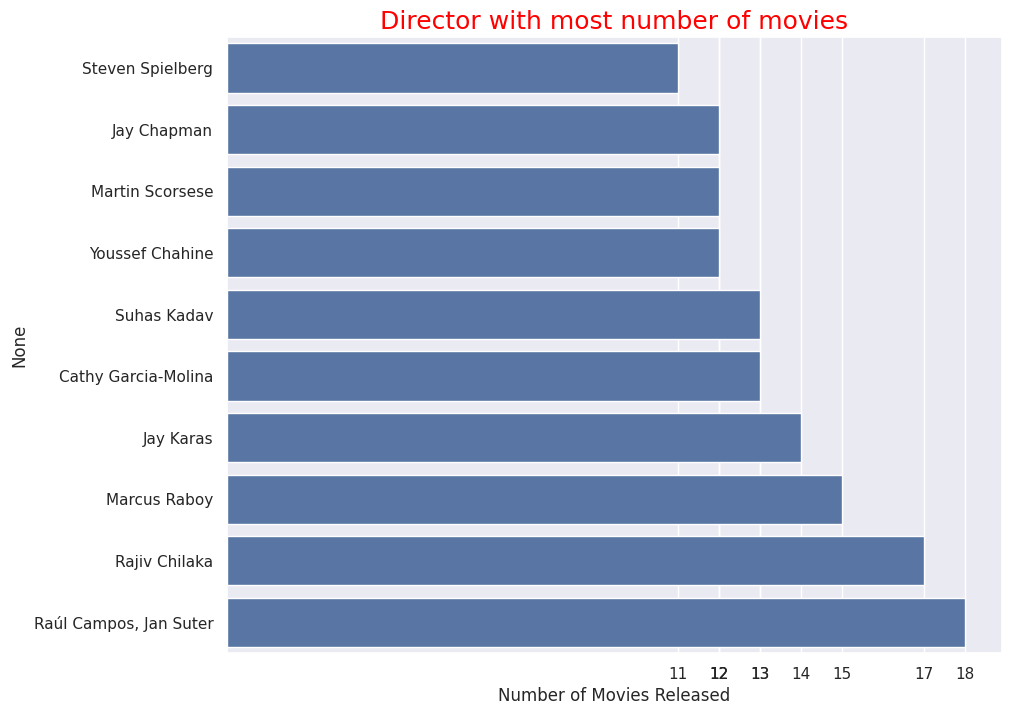

In [45]:
#Directors with most number of Movies produced
plt.figure(figsize=(10,8))
sns.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values)
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values)
plt.xlabel('Number of Movies Released')

Director Raul Campos,Jan Suter directed highest number of movies: 18

Text(0.5, 0, 'Number of Shows Released')

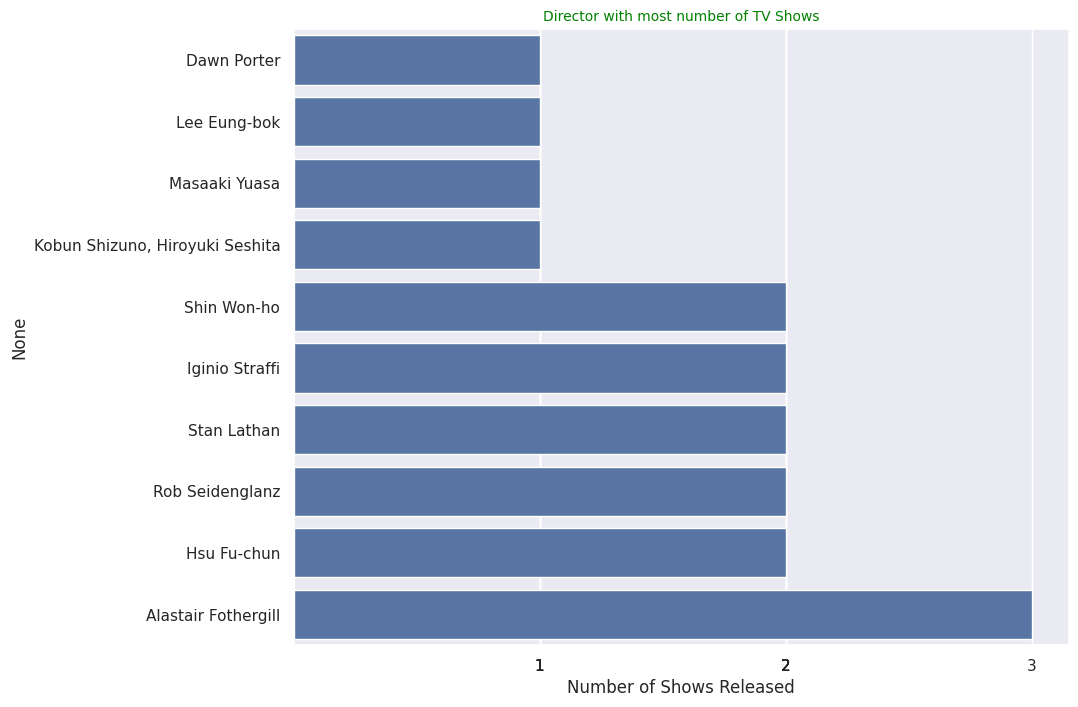

In [46]:
#directors and tv shows
plt.figure(figsize=(10,8))
sns.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values)
plt.title('Director with most number of TV Shows', color='green', fontsize=10)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values)
plt.xlabel('Number of Shows Released')

Alastair Fothergill released highest number of TV shows:3

Text(0, 0.5, 'Number of contents')

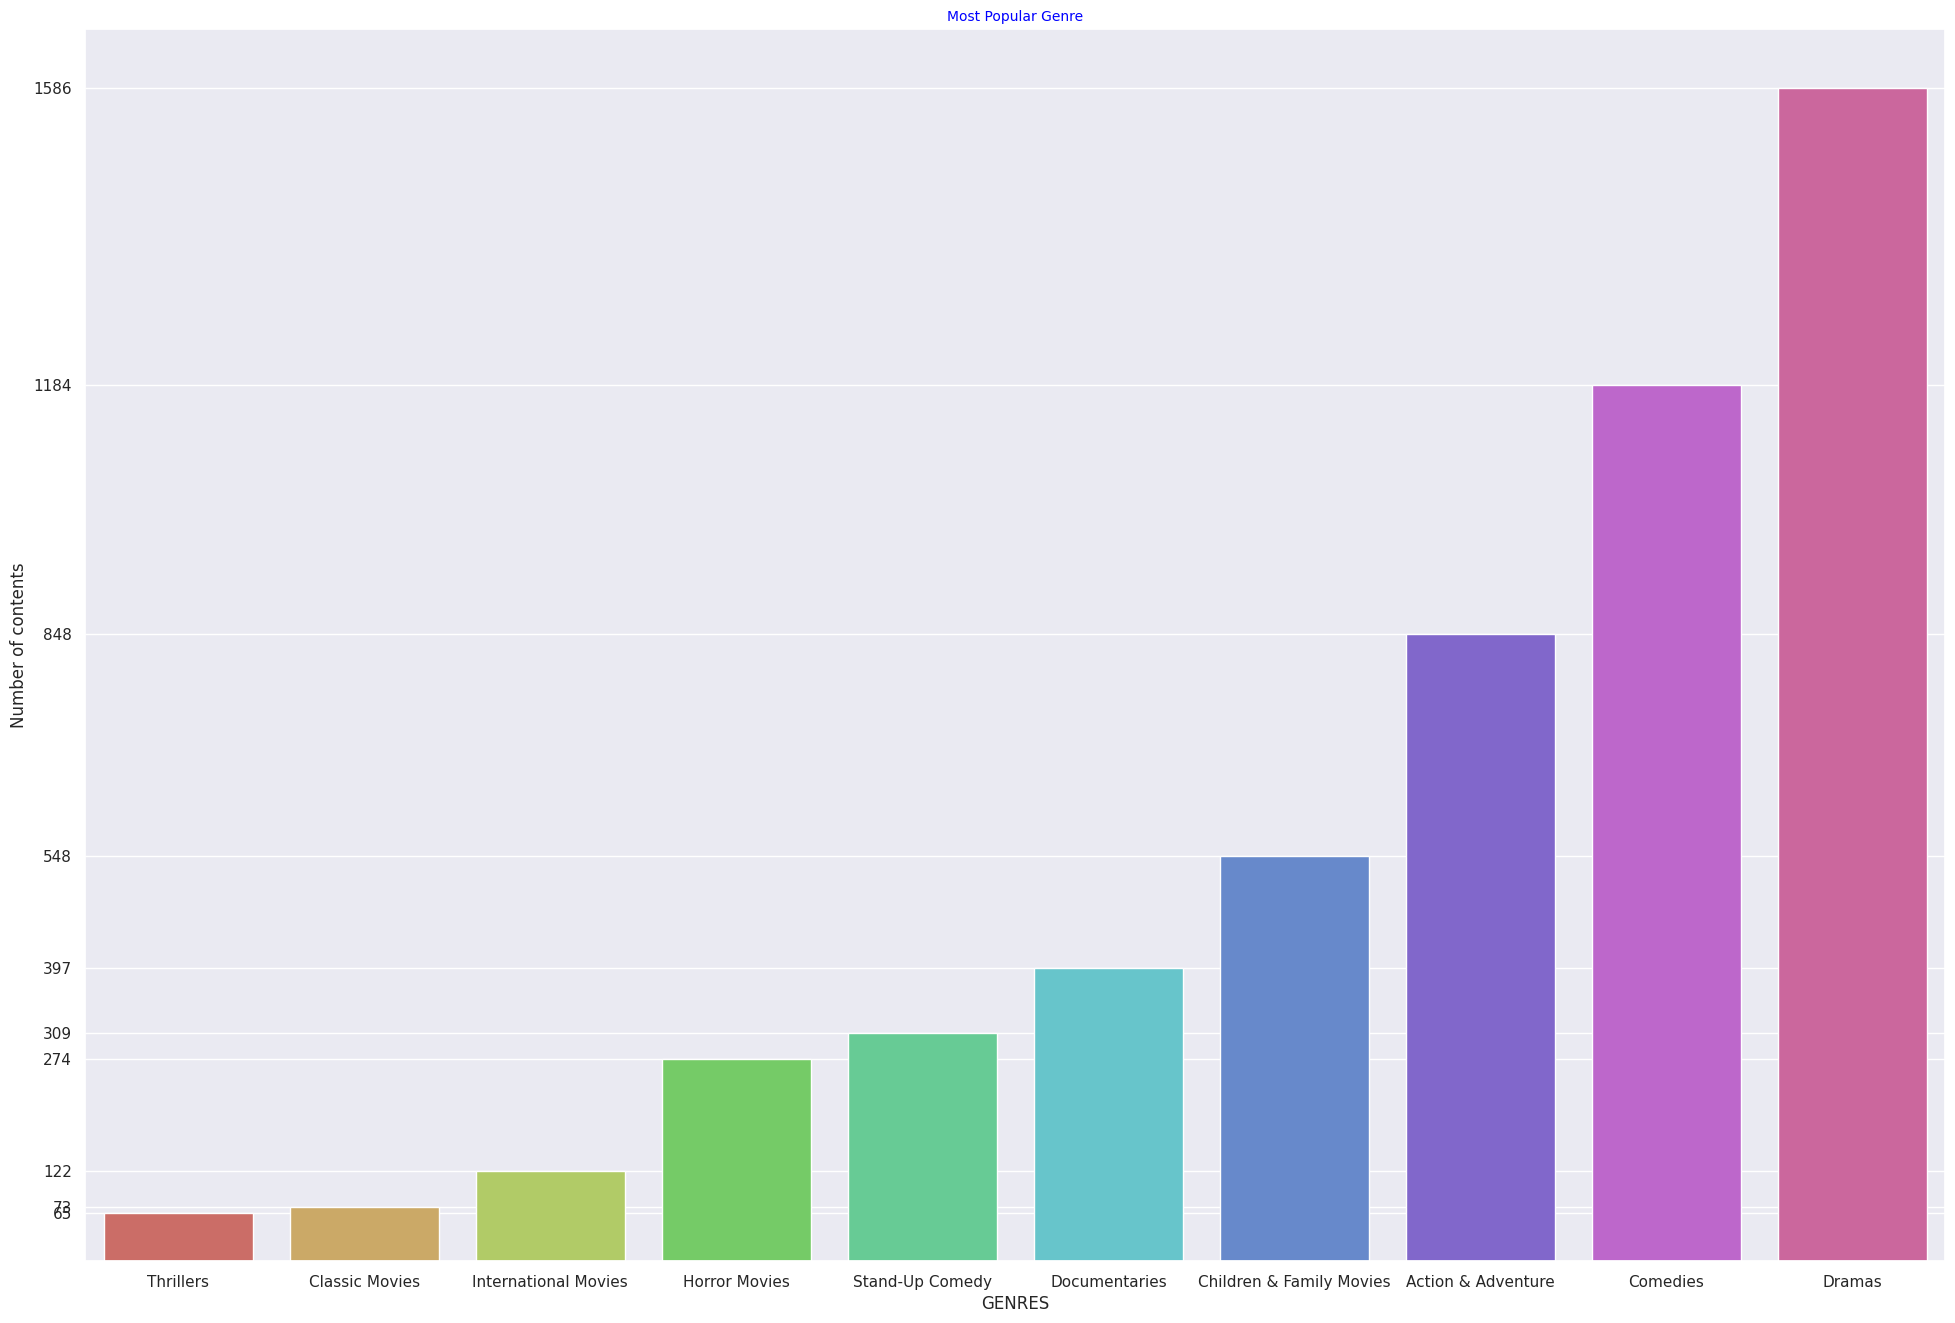

In [47]:
#poplular genre
plt.figure(figsize=(24,16))
sns.barplot(x= net_mov.Genre.value_counts()[:10].sort_values().index, y=net_mov.Genre.value_counts()[:10].sort_values().values,palette='hls')
plt.title('Most Popular Genre', color='Blue', fontsize=10)
plt.yticks(net_mov.Genre.value_counts()[:10].sort_values().values)
plt.xlabel('GENRES')
plt.ylabel('Number of contents')

Dramas are most poplular.
Comedies are second most popular

Text(0.5, 0, 'Content counts')

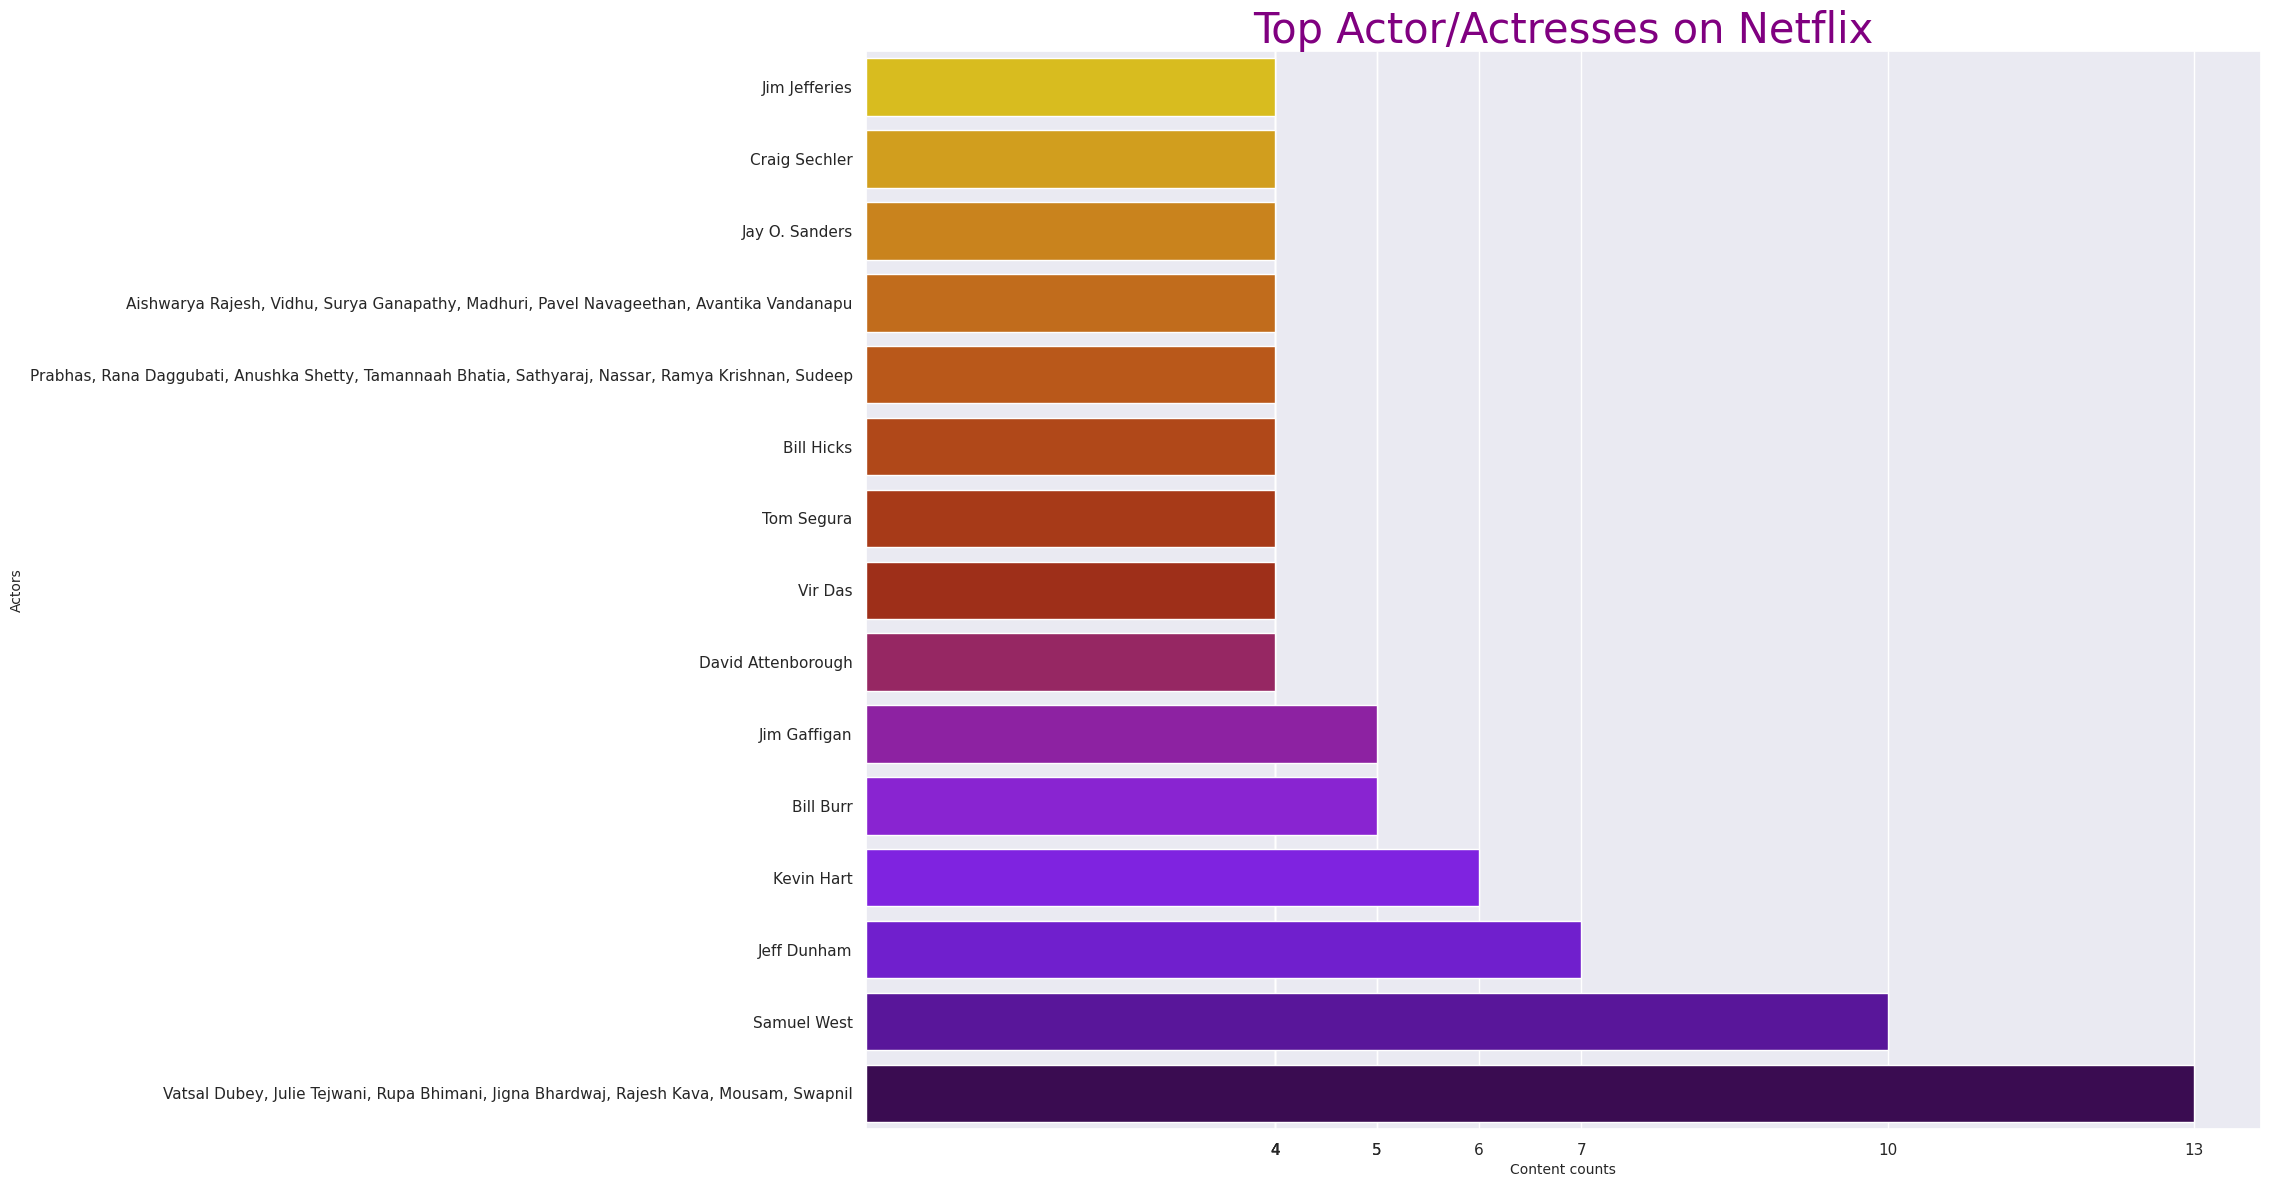

In [48]:
#popular actors
plt.figure(figsize=(18,14))
sns.barplot(y= net_mov.cast.value_counts()[:15].sort_values().index, x=net_mov.cast.value_counts()[:15].sort_values().values,palette='gnuplot_r')
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(net_mov.cast.value_counts()[:10].sort_values().values)
plt.ylabel('Actors', fontsize=10)
plt.xlabel('Content counts', fontsize=10)

Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapril has highest number of movies and Tv shows.

In [49]:
#content based on months
'''df_copy = df.copy()
net_date = df_copy[['date_added']]
net_date['year'] = net_date['date_added'].apply(lambda x : x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])'''

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_copy = net_mov.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T


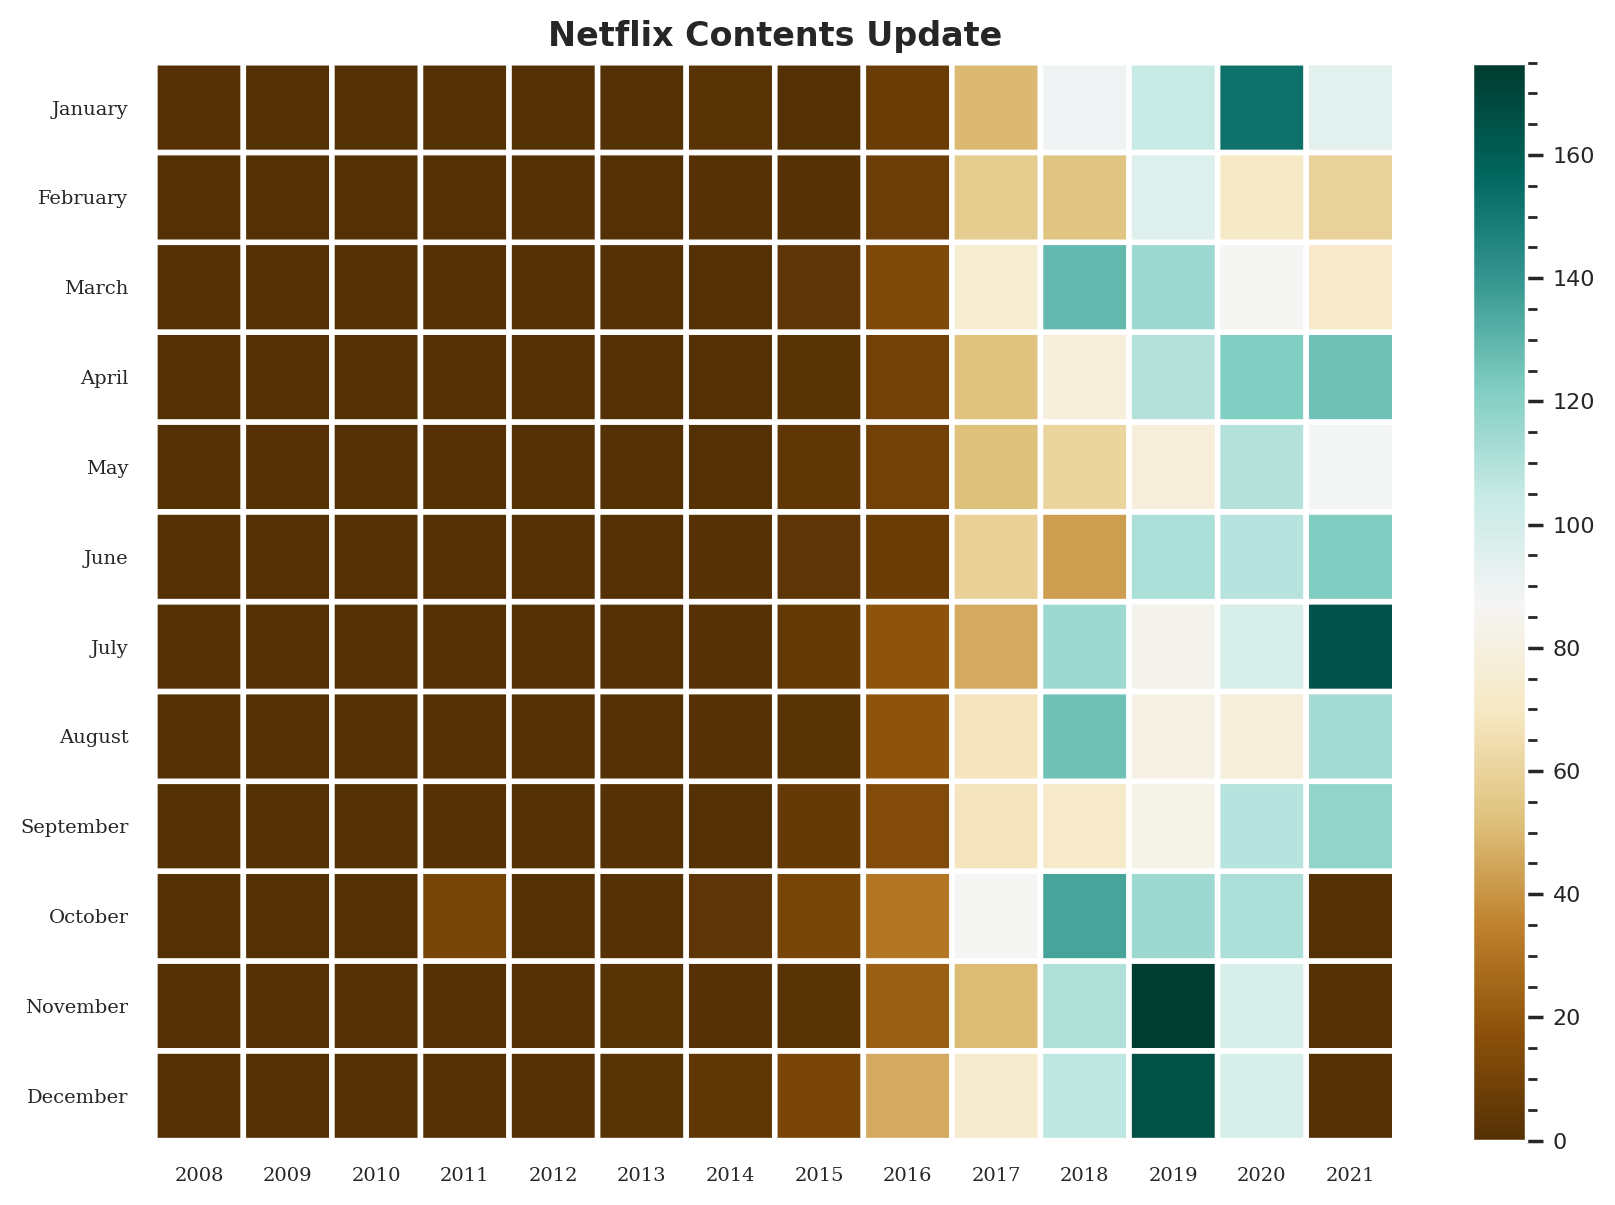

In [50]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_copy, cmap='BrBG', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_copy.columns), 1), df_copy.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_copy.index), 1), df_copy.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

more contents released on November, July, December and January.

# RECOMMENDATION SYSTEM

## Content Based Filtering

### Description based Recommender

In [51]:
net_mov['description']

2       To protect his family from a powerful drug lor...
5       The arrival of a charismatic young priest brin...
6       Equestria's divided. But a bright-eyed hero be...
7       On a photo shoot in Ghana, an American model s...
8       A talented batch of amateur bakers face off in...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 5700, dtype: object

We can calculate similarity scores for all movies based on their descriptions.

We convert descriptions into TF-IDF vectors to gauge word importance, reducing the impact of frequently occurring words in summaries for more accurate similarity scores.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Define a TF-IDF Vectorizer Object. Remove all stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [53]:
net_mov['description'].isnull().sum()

0

In [54]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(net_mov['description'])
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5700, 14767)

Using the TF-IDF vectorizer, we directly compute cosine similarity scores by leveraging sklearn's linear_kernel(), which is faster than cosine_similarities().

In [55]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [56]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(net_mov.index, index=net_mov['title']).drop_duplicates()

In [57]:
#function for getting the 10 most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return net_mov['title'].iloc[movie_indices]

In [58]:
get_recommendations('My Little Pony: A New Generation')

4713                         Baaghi
6967                  Hide and Seek
3865    Jo Pil-ho: The Dawning Rage
3869             Olympus Has Fallen
7830              Ramji Londonwaley
6711                  Event Horizon
6088               Acts of Violence
8029                     Skin Trade
980          Dügün Dernek 2: Sünnet
5296               Ek Jaan Hain Hum
Name: title, dtype: object

In [79]:
get_recommendations('zombieland')

8636         True to the Game
1631               Rust Creek
8111               Submission
2091         The Bridge Curse
3650            Twins Mission
1264        Our Idiot Brother
3911    Ek Khiladi Ek Haseena
1833               ParaNorman
2963                 Misfit 2
1459             Mean Girls 2
Name: title, dtype: object

We have used one feature only. we can see these are not so accurate, so we can try to add more metrics to improve model performance.

## title, description, Genre, cast, director, based Recommender System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [61]:
features=['Genre','director','cast','description','title']
filters = net_mov[features]

In [62]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(",", " "))

In [63]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)

filters.head()

,Genre,director,cast,description,title
2,crime tv shows,julien leclercq,sami bouajila tracy gotoas samuel jouy nabi...,to protect his family from a powerful drug lor...,ganglands
5,tv dramas,mike flanagan,kate siegel zach gilford hamish linklater h...,the arrival of a charismatic young priest brin...,midnight mass
6,children & family movies,robert cullen josé luis ucha,vanessa hudgens kimiko glenn james marsden ...,equestria's divided. but a bright-eyed hero be...,my little pony: a new generation
7,dramas,haile gerima,kofi ghanaba oyafunmike ogunlano alexandra d...,on a photo shoot in ghana an american model s...,sankofa
8,british tv shows,andy devonshire,mel giedroyc sue perkins mary berry paul ho...,a talented batch of amateur bakers face off in...,the great british baking show


- We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [64]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [65]:
filters['soup'] = filters.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF.

In [66]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [67]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [68]:
filters

,Genre,director,cast,description,title,soup
2,crime tv shows,julien leclercq,sami bouajila tracy gotoas samuel jouy nabi...,to protect his family from a powerful drug lor...,ganglands,julien leclercq sami bouajila tracy gotoas s...
5,tv dramas,mike flanagan,kate siegel zach gilford hamish linklater h...,the arrival of a charismatic young priest brin...,midnight mass,mike flanagan kate siegel zach gilford hamis...
6,children & family movies,robert cullen josé luis ucha,vanessa hudgens kimiko glenn james marsden ...,equestria's divided. but a bright-eyed hero be...,my little pony: a new generation,robert cullen josé luis ucha vanessa hudgens ...
7,dramas,haile gerima,kofi ghanaba oyafunmike ogunlano alexandra d...,on a photo shoot in ghana an american model s...,sankofa,haile gerima kofi ghanaba oyafunmike ogunlano...
8,british tv shows,andy devonshire,mel giedroyc sue perkins mary berry paul ho...,a talented batch of amateur bakers face off in...,the great british baking show,andy devonshire mel giedroyc sue perkins mar...
...,...,...,...,...,...,...
8801,dramas,majid al ansari,ali suliman saleh bakri yasa ali al-jabri ...,recovering alcoholic talal wakes up inside a s...,zinzana,majid al ansari ali suliman saleh bakri yasa...
8802,cult movies,david fincher,mark ruffalo jake gyllenhaal robert downey j...,a political cartoonist a crime reporter and a...,zodiac,david fincher mark ruffalo jake gyllenhaal r...
8804,comedies,ruben fleischer,jesse eisenberg woody harrelson emma stone ...,looking to survive in a world taken over by zo...,zombieland,ruben fleischer jesse eisenberg woody harrels...
8805,children & family movies,peter hewitt,tim allen courteney cox chevy chase kate ma...,dragged from civilian life a former superhero...,zoom,peter hewitt tim allen courteney cox chevy c...


In [69]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [73]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(',',' ').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return net_mov['title'].iloc[movie_indices]

In [75]:
get_recommendations_new('my little pony: a new generation', cosine_sim2)

1801                      Over the Moon
2656                    The Willoughbys
3016                                Hop
8641                              Turbo
6473            Chitty Chitty Bang Bang
8304                    The Flintstones
6798                         Free Willy
3475                  The Rugrats Movie
7110    Jack and the Cuckoo-Clock Heart
7933                        Santa Claws
Name: title, dtype: object

In [78]:
get_recommendations_new('zombieland', cosine_sim2)

6012                 30 Minutes or Less
7210                            Kingpin
1264                  Our Idiot Brother
1459                       Mean Girls 2
8494                      THE RUM DIARY
8636                   True to the Game
8126                           Superbad
3739                             Luckee
8438                   The New Romantic
6377    Bring It On: Worldwide Showdown
Name: title, dtype: object

In [77]:
get_recommendations_new('Naruto', cosine_sim2)

56               Naruto Shippuden the Movie: Blood Prison
7559                      Naruto Shippuden : Blood Prison
57                      Naruto Shippûden the Movie: Bonds
63      Naruto the Movie: Ninja Clash in the Land of Snow
59                            Naruto Shippuden: The Movie
58           Naruto Shippûden the Movie: The Will of Fire
62      Naruto the Movie 3: Guardians of the Crescent ...
5096                     Fullmetal Alchemist: Brotherhood
61       Naruto the Movie 2: Legend of the Stone of Gelel
1432                                 The Idhun Chronicles
Name: title, dtype: object